In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
aqi_data=pd.read_csv('aqi_data.csv')

In [2]:
#Standardizing the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
dataset=scaler.fit_transform(aqi_data.drop(['aqi','state','timestamp'],axis=1))

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
import xgboost

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(dataset,aqi_data['aqi'].values,test_size=0.22,shuffle=True,random_state=42)

Minimum error:- 0.06841219600144237 at index = 2


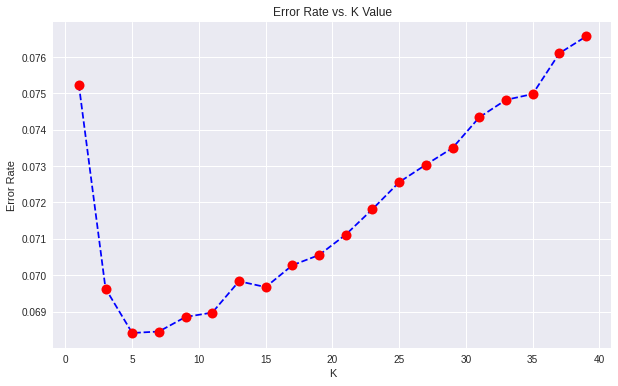

Max Accuracy:- 0.9315878039985577 at index = 2


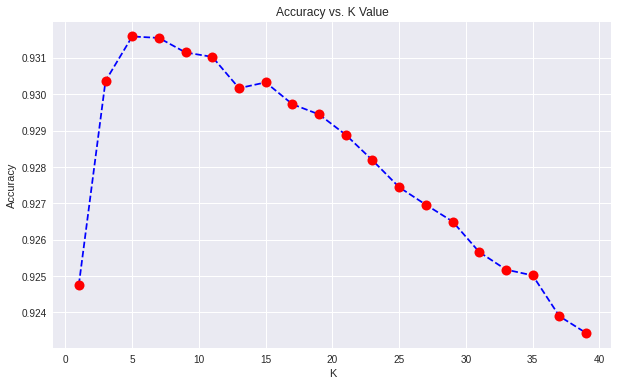

In [ ]:
#KNN
error_rate = []
score=[]
for i in range(1,41,2):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_test)
 score_i=knn.score(x_test,y_test)
 score.append(score_i)
 error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40,2),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at index =",error_rate.index(min(error_rate)))
plt.show()

plt.figure(figsize=(10,6))
plt.plot(range(1,40,2),score,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Max Accuracy:-",max(score),"at index =",score.index(max(score)))


In [ ]:
#Taking K=5 and using stratified K-fold
skfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
model=KNeighborsClassifier(n_neighbors=5)
scores=cross_val_score(model,dataset,aqi_data['aqi'].values,cv=skfold)
print('AVG ACCURACY',np.mean(scores))
print('MAX ACCURACY',np.max(scores))
print('MIN ACCURACY',np.min(scores))

AVG ACCURACY 0.9320084998632204
MAX ACCURACY 0.9339341986381365
MIN ACCURACY 0.9303863020339804


#### Getting average accuracy of 93.2% using KNN with k=5

In [ ]:
#Logistic Regression
logisticregression=LogisticRegression(max_iter=100000)
skfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
scores=cross_val_score(logisticregression,dataset,aqi_data['aqi'].values,cv=skfold)
print('AVG ACCURACY',np.mean(scores))
print('MAX ACCURACY',np.max(scores))
print('MIN ACCURACY',np.min(scores))

AVG ACCURACY 0.9438377114363897
MAX ACCURACY 0.9453271336962031
MIN ACCURACY 0.9417351638423059


#### Getting average accuracy of 94.38 % using logistic Regression

In [5]:
rf=RandomForestClassifier()
random_grid = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'n_estimators': [100,110,120,130,140,150,160,180,230]}
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 250,cv = 5, random_state=42,scoring='accuracy',n_jobs = -1)
rf_random.fit(dataset,aqi_data['aqi'].values)

In [7]:
rf=RandomForestClassifier(n_estimators=120,max_depth=8,max_features='sqrt')
skfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
scores=cross_val_score(rf,dataset,aqi_data['aqi'].values,cv=skfold)
print('AVG ACCURACY',np.mean(scores))
print('MAX ACCURACY',np.max(scores))
print('MIN ACCURACY',np.min(scores))

AVG ACCURACY 0.9989995414070562
MAX ACCURACY 0.9994050111284956
MIN ACCURACY 0.9983692897595804


#### Getting average accuracy of 99.89% using Random Forest Classifier

In [10]:
xgb = xgboost.XGBClassifier(max_depth=6, learning_rate=0.07, n_estimators=125)
skfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
scores=cross_val_score(xgb,dataset,aqi_data['aqi'].values,cv=skfold)
print('AVG ACCURACY',np.mean(scores))
print('MAX ACCURACY',np.max(scores))
print('MIN ACCURACY',np.min(scores))

AVG ACCURACY 0.9997664126504562
MAX ACCURACY 0.9998457436259063
MIN ACCURACY 0.999669450626942


#### Xgboost performs the best with an average accuracy of 99.97%

In [11]:
import pickle
file_name = "xgb_clf.pkl"

# save
pickle.dump(xgb, open(file_name, "wb"))

# load
#xgb_model_loaded = pickle.load(open(file_name, "rb"))